## Web Analytics DATA 620 - Project 1

### Group Members: Tora Mullings, Coffy Andrews-Guo

### Popular Baby Names
What relationships can be uncovered in a dataset about baby names? NYC OpenData hosts the Popular Baby Names dataset, which includes information about such as the birth year, gender, ethnicity, count, and of course the name. How can this data be organized into a network format, and what do different centrality metrics say about the popularity of a name within its ethnic group?

[Link to Dataset](https://data.cityofnewyork.us/Health/Popular-Baby-Names/25th-nujf)

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx

def getData():
        # initialize dataframe with first 1000 records
    columns_str="gndr,ethcty,nm,cnt,rnk"

    url = ('https://data.cityofnewyork.us/resource/25th-nujf.json?' +\
    '&$limit=1000' +\
    '&$offset=0' +\
    '&$select=' + columns_str +\
    '&$where=brth_yr=2019'
    ).replace(' ', '%20')

    df = pd.read_json(url)

    x = 2  # number of sets of 1000

    for i in range(1, x):
        url = ('https://data.cityofnewyork.us/resource/25th-nujf.json?' +\
        '&$limit=1000' +\
        '&$offset=' + str(1000*i) +\
        '&$select=' + columns_str +\
        '&$where=brth_yr=2019'
        ).replace(' ', '%20')

        df = pd.concat([df, pd.read_json(url)], axis=0)
    
    # Droping NAN value rows
    df = df.replace('',np.nan)
    df = df.dropna(axis="rows", how="any")

    return df

df = getData()

### Count of records for each ethnicity


In [33]:
hispanic = df.loc[df.ethcty == "HISPANIC"]
asian = df.loc[df.ethcty == "ASIAN AND PACIFIC ISLANDER"]
black = df.loc[df.ethcty == "BLACK NON HISPANIC"]
white = df.loc[df.ethcty == "WHITE NON HISPANIC"]

hispanic_cnt = len(hispanic)
asian_cnt = len(asian)
black_cnt = len(black)
white_cnt = len(white)

* Asian and Pacific Islander: 332
* Hispanic: 518
* Black Non-Hispanic: 340
* White Non-Hispanic: 745

# Create Graphs


* There are two types of nodes, Name and Ethnicity.
* All Name nodes are sourced from an Ethnicity node.

In [34]:
def get_subgraph_bfs(graph, start_node, num_node):
    node_set = set()
    probbed = {start_node}
    bfs_queue = queue.deque()
    bfs_queue.append(start_node)
    while len(bfs_queue) > 0:
        i = bfs_queue.popleft()
        node_set.add(i)
        for j in graph[i]:
            if j not in probbed:
                probbed.add(j)
                bfs_queue.append(j)
        if len(node_set) >= num_node:
            return nx.subgraph(graph, node_set)

In [35]:
# Creating the networkx graph object
B = nx.from_pandas_edgelist(df, source='ethcty', target ='nm'
                            , edge_attr=['nm','cnt', 'rnk']
                            , create_using=nx.DiGraph(directed=True))

### Simple Subgraphs
* Per ethnicity
* Top 5 Names, Male and Female
* The size of the node denotes the count of the Name.
* Node color: Pink = Female, Blue = Male 

In [36]:
black = pd.concat([black.loc[black.gndr=="FEMALE"][0:5], black.loc[black.gndr=="MALE"][0:5]], ignore_index=True)
colors = ["white"] + ['pink' if black.loc[i,'gndr']=="FEMALE" else 'blue' for i in range(10) ]
sizes = [500] + [black.iloc[i,4]*100 for i in range(len(black))]
w = nx.from_pandas_edgelist(black
                            , source='ethcty', target ='nm'
                            , edge_attr=['gndr','cnt', 'rnk']
                            , create_using=nx.DiGraph(directed=True))

hispanic = pd.concat([hispanic.loc[hispanic.gndr=="FEMALE"][0:5], hispanic.loc[hispanic.gndr=="MALE"][0:5]], ignore_index=True)
colors = ["white"] + ['pink' if hispanic.loc[i,'gndr']=="FEMALE" else 'blue' for i in range(10) ]
sizes = [500] + [hispanic.iloc[i,4]*100 for i in range(len(hispanic))]
x = nx.from_pandas_edgelist(hispanic
                            , source='ethcty', target ='nm'
                            , edge_attr=['gndr','cnt', 'rnk']
                            , create_using=nx.DiGraph(directed=True))

asian = pd.concat([asian.loc[asian.gndr=="FEMALE"][0:5], asian.loc[asian.gndr=="MALE"][0:5]], ignore_index=True)
colors = ["white"] + ['pink' if asian.loc[i,'gndr']=="FEMALE" else 'blue' for i in range(10) ]
sizes = [500] + [asian.iloc[i,4]*100 for i in range(len(asian))]
y = nx.from_pandas_edgelist(asian
                            , source='ethcty', target ='nm'
                            , edge_attr=['gndr','cnt', 'rnk']
                            , create_using=nx.DiGraph(directed=True))

white = pd.concat([white.loc[white.gndr=="FEMALE"][0:5], white.loc[white.gndr=="MALE"][0:5]], ignore_index=True)
colors = ["white"] + ['pink' if white.loc[i,'gndr']=="FEMALE" else 'blue' for i in range(10) ]
sizes = [500] + [white.iloc[i,4]*100 for i in range(len(white))]
z = nx.from_pandas_edgelist(white
                            , source='ethcty', target ='nm'
                            , edge_attr=['gndr','cnt', 'rnk']
                            , create_using=nx.DiGraph(directed=True, node_color=colors, node_size=sizes))

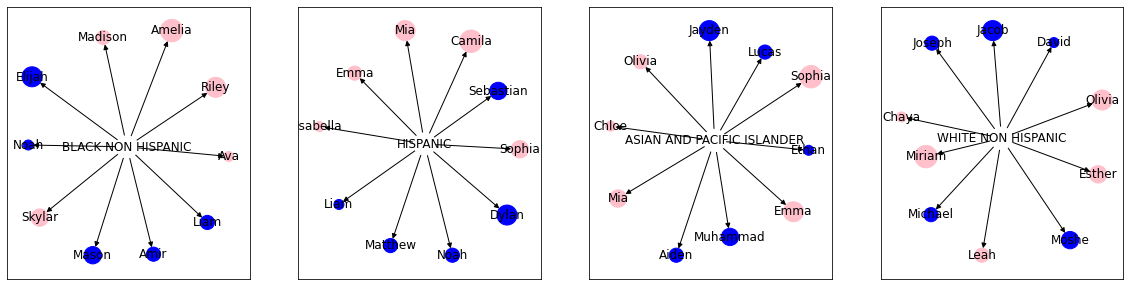

In [37]:
graphs = [w, x, y, z]

plt.figure(figsize = (20, 5))
for i, graph in enumerate(graphs):
    
    plt.subplot(1, 4, i + 1)
    nx.draw_networkx(graph, with_labels=True, arrows=True, node_color=colors, node_size=sizes)
plt.show()

# Graph Stats
Full graph, all ethnicities included

In [38]:
def print_graph_stats(title, g):
    print("Simple stats for: " + title)
    print("Number of nodes: " + str(len(g.nodes())))
    print("Number of edges: " + str(len(g.edges())))
    print("Graph density: " + str(nx.density(g)))
    print("Is graph connected? " + str(nx.is_weakly_connected(g)))
    print("Graph type: " + str(type(g)) + "\n\n")

print_graph_stats("Popular Baby Names", B)

Simple stats for: Popular Baby Names
Number of nodes: 1185
Number of edges: 1919
Graph density: 0.001367744326605086
Is graph connected? True
Graph type: <class 'networkx.classes.digraph.DiGraph'>




# Centrality
* Eigenvector Centrality
* Degree Centrality

### Full network


In [39]:
dgr = nx.degree_centrality(B)
eig = nx.eigenvector_centrality(B)
centralities = pd.concat(
[pd.Series(c) for c in (eig, dgr)],
axis=1)
centralities.columns = ("Eigenvector", "Degree")
table = pd.DataFrame(centralities)
table

,Eigenvector,Degree
HISPANIC,0.000175,0.435811
Liam,0.061024,0.003378
Noah,0.061024,0.003378
Matthew,0.061024,0.003378
Sebastian,0.061024,0.003378
...,...,...
Sanai,0.015387,0.000845
Sariyah,0.015387,0.000845
Sevyn,0.015387,0.000845
Zariah,0.015387,0.000845


# Summary
* There is inter-ethnicity variation in the eigenvector and degree centralities, but none for intra-ethnicity.
 * For example, all nodes within the hispanic category have the same centralities. This is because they all share one parent node, their ethnicity.
 * An Ethnicity node that has a lower centrality than another has fewer Name nodes- fewer unique names were chosen in 2019.
 * Similarly, names with higher eigenvector and/or degree centralities occur more frequently within their ethnic group.
* Due to the structure of the graph, the Ethnicity nodes have the highest centralities since they are the root of many Name nodes.